# 2. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 1.Create two csv files of training and test dataset

In [4]:
wine=pd.read_csv('winequality.csv')
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=wine.drop('quality',axis=1)
y=wine['quality']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [8]:
train_set=X_train.join(y_train)
test_set=X_test.join(y_test)

In [11]:
train_set.to_csv('wine_trainset.csv',index=False)
test_set.to_csv('wine_testset.csv',index=False)

# 3.Load Both Datasets into Python as pandas DataFrame

In [12]:
df_train=pd.read_csv('wine_trainset.csv')
df_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.3,0.180,0.22,1.50,0.043,45.0,155.0,0.99238,3.19,0.48,10.2,5
1,white,5.7,0.320,0.38,4.75,0.033,23.0,94.0,0.99100,3.42,0.42,11.8,7
2,white,5.6,0.410,0.24,1.90,0.034,10.0,53.0,0.98815,3.32,0.50,13.5,7
3,red,10.8,0.290,0.42,1.60,0.084,19.0,27.0,0.99545,3.28,0.73,11.9,6
4,red,8.2,0.350,0.33,2.40,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347,white,5.6,0.295,0.26,1.10,0.035,40.0,102.0,0.99154,3.47,0.56,10.6,6
4348,white,7.3,0.330,0.22,1.40,0.041,40.0,177.0,0.99287,3.14,0.48,9.9,5
4349,white,5.8,0.190,0.24,1.30,0.044,38.0,128.0,0.99362,3.77,0.60,10.6,5
4350,white,7.4,0.180,0.42,2.10,0.036,33.0,187.0,0.99380,3.40,0.41,10.6,7


In [13]:
df_test=pd.read_csv('wine_testset.csv')
df_test

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,10.1,0.43,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7
1,white,7.6,0.31,0.23,12.7,0.054,20.0,139.0,0.99836,3.16,0.50,9.7,4
2,white,6.8,0.31,0.32,7.6,0.052,35.0,143.0,0.99590,3.14,0.38,9.0,5
3,red,7.6,0.63,0.03,2.0,0.080,27.0,43.0,0.99578,3.44,0.64,10.9,6
4,white,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,white,5.8,0.27,0.26,3.5,0.071,26.0,69.0,0.98994,3.10,0.38,11.5,6
2141,white,5.9,0.26,0.21,12.5,0.034,36.0,152.0,0.99720,3.28,0.43,9.5,6
2142,white,6.3,0.23,0.30,1.8,0.033,16.0,91.0,0.99060,3.28,0.40,11.8,6
2143,white,7.2,0.46,0.65,10.4,0.050,76.0,192.0,0.99760,3.16,0.42,8.7,5


# 4. Display dataframe information and first 10 rows.

In [189]:
df_train.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.3,0.18,0.22,1.50,0.043,45.0,155.0,0.99238,3.19,0.48,10.2,5
1,white,5.7,0.32,0.38,4.75,0.033,23.0,94.0,0.99100,3.42,0.42,11.8,7
2,white,5.6,0.41,0.24,1.90,0.034,10.0,53.0,0.98815,3.32,0.50,13.5,7
3,red,10.8,0.29,0.42,1.60,0.084,19.0,27.0,0.99545,3.28,0.73,11.9,6
4,red,8.2,0.35,0.33,2.40,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,6
5,red,8.3,0.56,0.22,2.40,0.082,10.0,86.0,0.99830,3.37,0.62,9.5,5
6,white,7.0,0.34,0.39,6.90,0.066,43.0,162.0,0.99561,3.11,0.53,9.5,5
7,white,8.8,0.33,0.44,6.35,0.024,9.0,87.0,0.99170,2.96,0.40,12.6,7
8,white,8.2,0.36,0.29,7.60,0.035,37.0,122.0,0.99390,3.16,0.34,12.0,5
9,white,7.0,0.29,0.33,0.90,0.041,20.0,117.0,0.99048,3.21,0.50,11.4,5


In [14]:
df_test.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,10.1,0.43,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7
1,white,7.6,0.31,0.23,12.7,0.054,20.0,139.0,0.99836,3.16,0.50,9.7,4
2,white,6.8,0.31,0.32,7.6,0.052,35.0,143.0,0.99590,3.14,0.38,9.0,5
3,red,7.6,0.63,0.03,2.0,0.080,27.0,43.0,0.99578,3.44,0.64,10.9,6
4,white,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3
5,red,5.4,0.58,0.08,1.9,0.059,20.0,31.0,0.99484,3.50,0.64,10.2,6
6,white,5.1,0.39,0.21,1.7,0.027,15.0,72.0,0.98940,3.50,0.45,12.5,6
7,white,8.7,0.30,0.34,4.8,0.018,23.0,127.0,0.99474,3.12,0.49,11.2,7
8,white,6.0,0.42,0.41,12.4,0.032,50.0,179.0,0.99622,3.14,0.60,9.7,5
9,white,6.8,0.15,0.33,4.7,0.059,31.0,118.0,0.99560,3.43,0.39,9.0,7


# 5. Find any NaN or empty values in the datasets, and show how you deal with them.

In [190]:
df_train.isnull()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347,False,False,False,False,False,False,False,False,False,False,False,False,False
4348,False,False,False,False,False,False,False,False,False,False,False,False,False
4349,False,False,False,False,False,False,False,False,False,False,False,False,False
4350,False,False,False,False,False,False,False,False,False,False,False,False,False


In [191]:
df_train.isnull().sum()

type                    0
fixed acidity           6
volatile acidity        5
citric acid             3
residual sugar          2
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      6
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [192]:
df_train.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [194]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4346.000000,4347.000000,4349.000000,4350.000000,4351.000000,4352.000000,4352.000000,4352.000000,4346.000000,4350.000000,4352.000000,4352.000000
mean,7.215842,0.336467,0.320161,5.459793,0.055683,30.744830,116.410386,0.994668,3.215801,0.528743,10.497339,5.818015
std,1.278604,0.162998,0.145397,4.712940,0.035423,17.587202,56.701174,0.002935,0.159439,0.148668,1.187874,0.872716
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.000000,0.992360,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994800,3.200000,0.500000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.064000,42.000000,156.000000,0.996920,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,146.500000,366.500000,1.010300,4.010000,2.000000,14.900000,9.000000


In [195]:
df_train['fixed acidity'] = df_train['fixed acidity'].fillna(df_train['fixed acidity'].mean())
df_train['volatile acidity'] = df_train['volatile acidity'].fillna(df_train['volatile acidity'].mean())
df_train['citric acid'] = df_train['citric acid'].fillna(df_train['citric acid'].mean())
df_train['residual sugar'] = df_train['residual sugar'].fillna(df_train['residual sugar'].mean())
df_train['chlorides'] = df_train['chlorides'].fillna(df_train['chlorides'].mean())
df_train['pH'] = df_train['pH'].fillna(df_train['pH'].mean())
df_train['sulphates'] = df_train['sulphates'].fillna(df_train['sulphates'].mean())

In [148]:
df_train.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [149]:
"""cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','pH','sulphates']"""

"cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','pH','sulphates']"

In [150]:
"""for i in cols:
    df_train[i] = df_train.fillna(df_train.mean())"""

'for i in cols:\n    df_train[i] = df_train.fillna(df_train.mean())'

In [ ]:
#imputing the test dataset

In [215]:
df_test.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [216]:
def clean(i):
    df_test[i]=df_test[i].fillna(df_test[i].mean())

In [217]:
clean('fixed acidity')
clean('volatile acidity')
clean('chlorides')
clean('pH')
clean('sulphates')

In [218]:
df_test.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 6. Draw boxplot for at least one numerical column.

<AxesSubplot:xlabel='fixed acidity'>

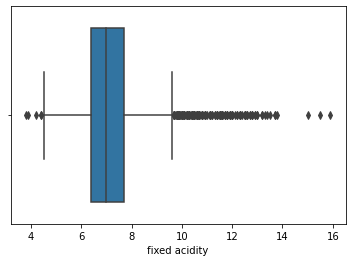

In [196]:
sns.boxplot(x='fixed acidity',data = df_train)

# 7. Detect outliers and show how you deal with them.

In [197]:
Q1 = df_train.quantile(0.25)

In [198]:
Q3 = df_train.quantile(0.75)

In [199]:
IQR = Q3 - Q1

In [200]:
IQR

fixed acidity            1.30000
volatile acidity         0.17000
citric acid              0.14000
residual sugar           6.30000
chlorides                0.02600
free sulfur dioxide     25.00000
total sulfur dioxide    77.00000
density                  0.00456
pH                       0.21000
sulphates                0.17000
alcohol                  1.80000
quality                  1.00000
dtype: float64

In [201]:
df_train[~((df_train<(Q1 - 1.5*IQR)) | (df_train > (Q3 + 1.5*IQR))).any(axis = 1)]

<ipython-input-201-ae29f1d05e8c>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_train[~((df_train<(Q1 - 1.5*IQR)) | (df_train > (Q3 + 1.5*IQR))).any(axis = 1)]
<ipython-input-201-ae29f1d05e8c>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_train[~((df_train<(Q1 - 1.5*IQR)) | (df_train > (Q3 + 1.5*IQR))).any(axis = 1)]


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.3,0.180,0.22,1.50,0.043,45.0,155.0,0.99238,3.19,0.48,10.2,5
1,white,5.7,0.320,0.38,4.75,0.033,23.0,94.0,0.99100,3.42,0.42,11.8,7
2,white,5.6,0.410,0.24,1.90,0.034,10.0,53.0,0.98815,3.32,0.50,13.5,7
4,red,8.2,0.350,0.33,2.40,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,6
5,red,8.3,0.560,0.22,2.40,0.082,10.0,86.0,0.99830,3.37,0.62,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,red,7.1,0.430,0.17,1.80,0.082,27.0,51.0,0.99634,3.49,0.64,10.4,5
4347,white,5.6,0.295,0.26,1.10,0.035,40.0,102.0,0.99154,3.47,0.56,10.6,6
4348,white,7.3,0.330,0.22,1.40,0.041,40.0,177.0,0.99287,3.14,0.48,9.9,5
4350,white,7.4,0.180,0.42,2.10,0.036,33.0,187.0,0.99380,3.40,0.41,10.6,7


# 8. Create correlation matrix between numerical columns.

In [202]:
df_train.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.227444,0.317278,-0.114133,0.289473,-0.284687,-0.321740,0.459195,-0.243719,0.305063,-0.084907,-0.086230
volatile acidity,0.227444,1.000000,-0.374242,-0.204493,0.368854,-0.352226,-0.407267,0.271225,0.252715,0.224411,-0.051932,-0.270632
citric acid,0.317278,-0.374242,1.000000,0.138502,0.057345,0.132964,0.192338,0.091656,-0.323104,0.075025,-0.005076,0.081875
residual sugar,-0.114133,-0.204493,0.138502,1.000000,-0.130712,0.414561,0.488350,0.541696,-0.266065,-0.185756,-0.353978,-0.021076
chlorides,0.289473,0.368854,0.057345,-0.130712,1.000000,-0.187658,-0.264718,0.359567,0.048429,0.425485,-0.255031,-0.192970
free sulfur dioxide,-0.284687,-0.352226,0.132964,0.414561,-0.187658,1.000000,0.720369,0.037926,-0.150865,-0.196191,-0.187737,0.075318
total sulfur dioxide,-0.321740,-0.407267,0.192338,0.488350,-0.264718,0.720369,1.000000,0.042078,-0.226364,-0.270188,-0.269659,-0.036281
density,0.459195,0.271225,0.091656,0.541696,0.359567,0.037926,0.042078,1.000000,0.027950,0.271537,-0.696094,-0.305351
pH,-0.243719,0.252715,-0.323104,-0.266065,0.048429,-0.150865,-0.226364,0.027950,1.000000,0.202947,0.098582,0.017211
sulphates,0.305063,0.224411,0.075025,-0.185756,0.425485,-0.196191,-0.270188,0.271537,0.202947,1.000000,-0.016162,0.032750


# 9. Draw heatmap of the correlation matrix of numerical columns.

<AxesSubplot:>

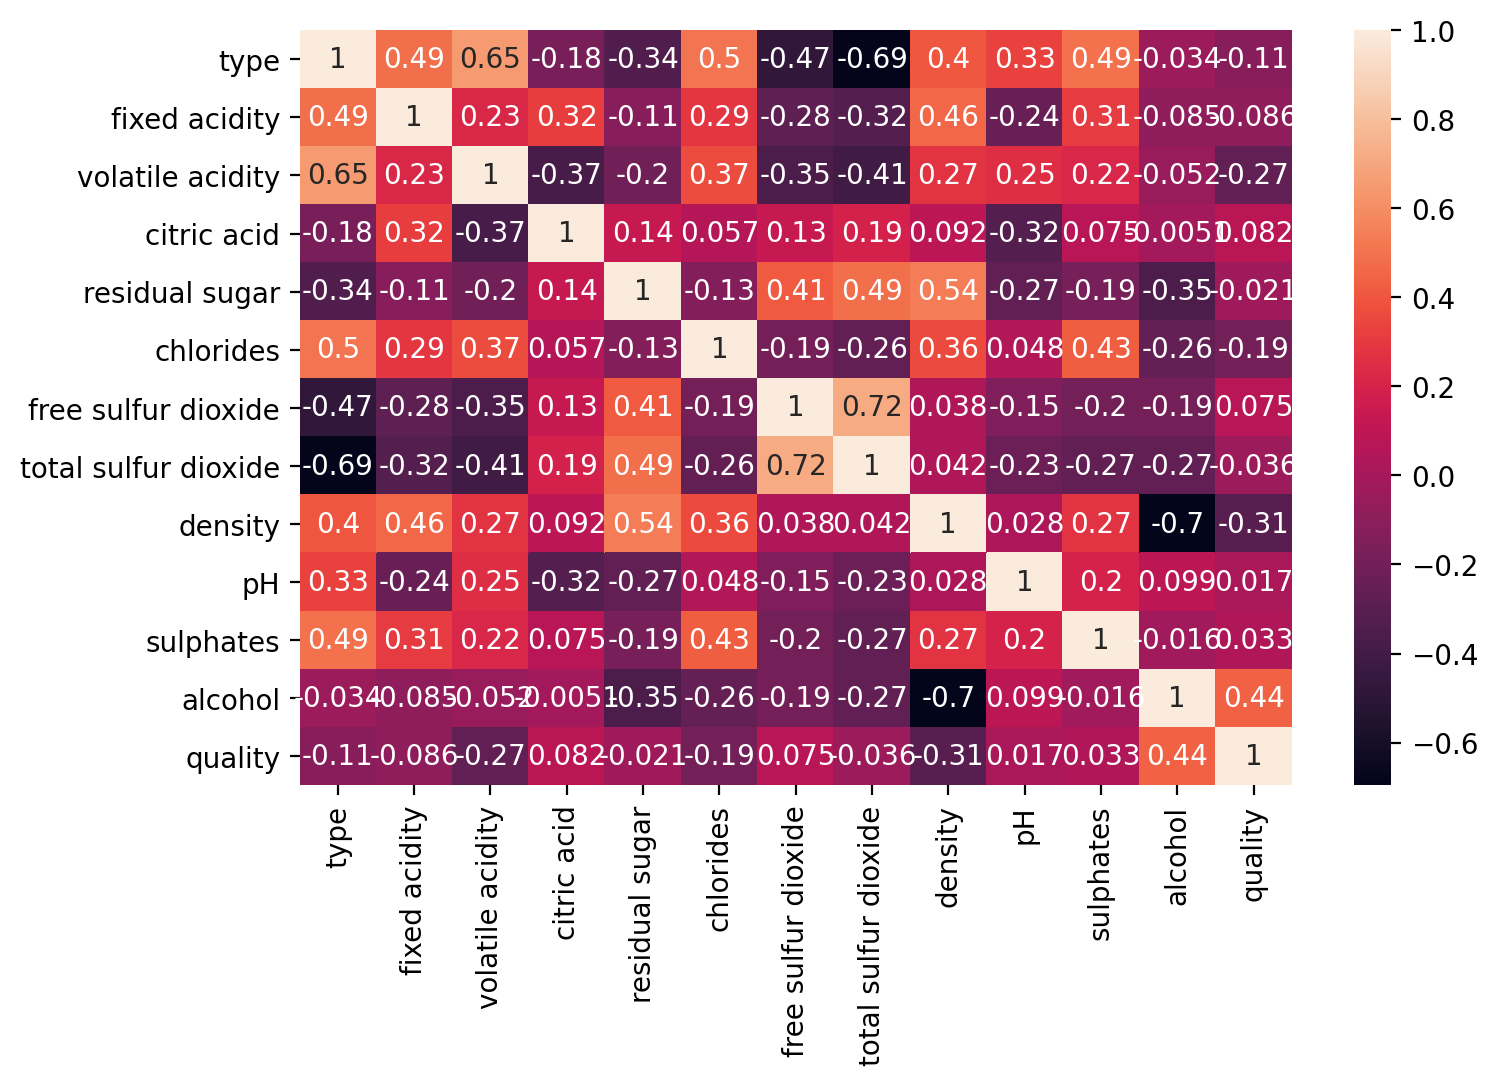

In [241]:
plt.figure(figsize=(8,5),dpi=200)
sns.heatmap(df_train.corr(),annot=True)

# 10. Draw the pairplots between all columns. If you can, color the data points by the output column.

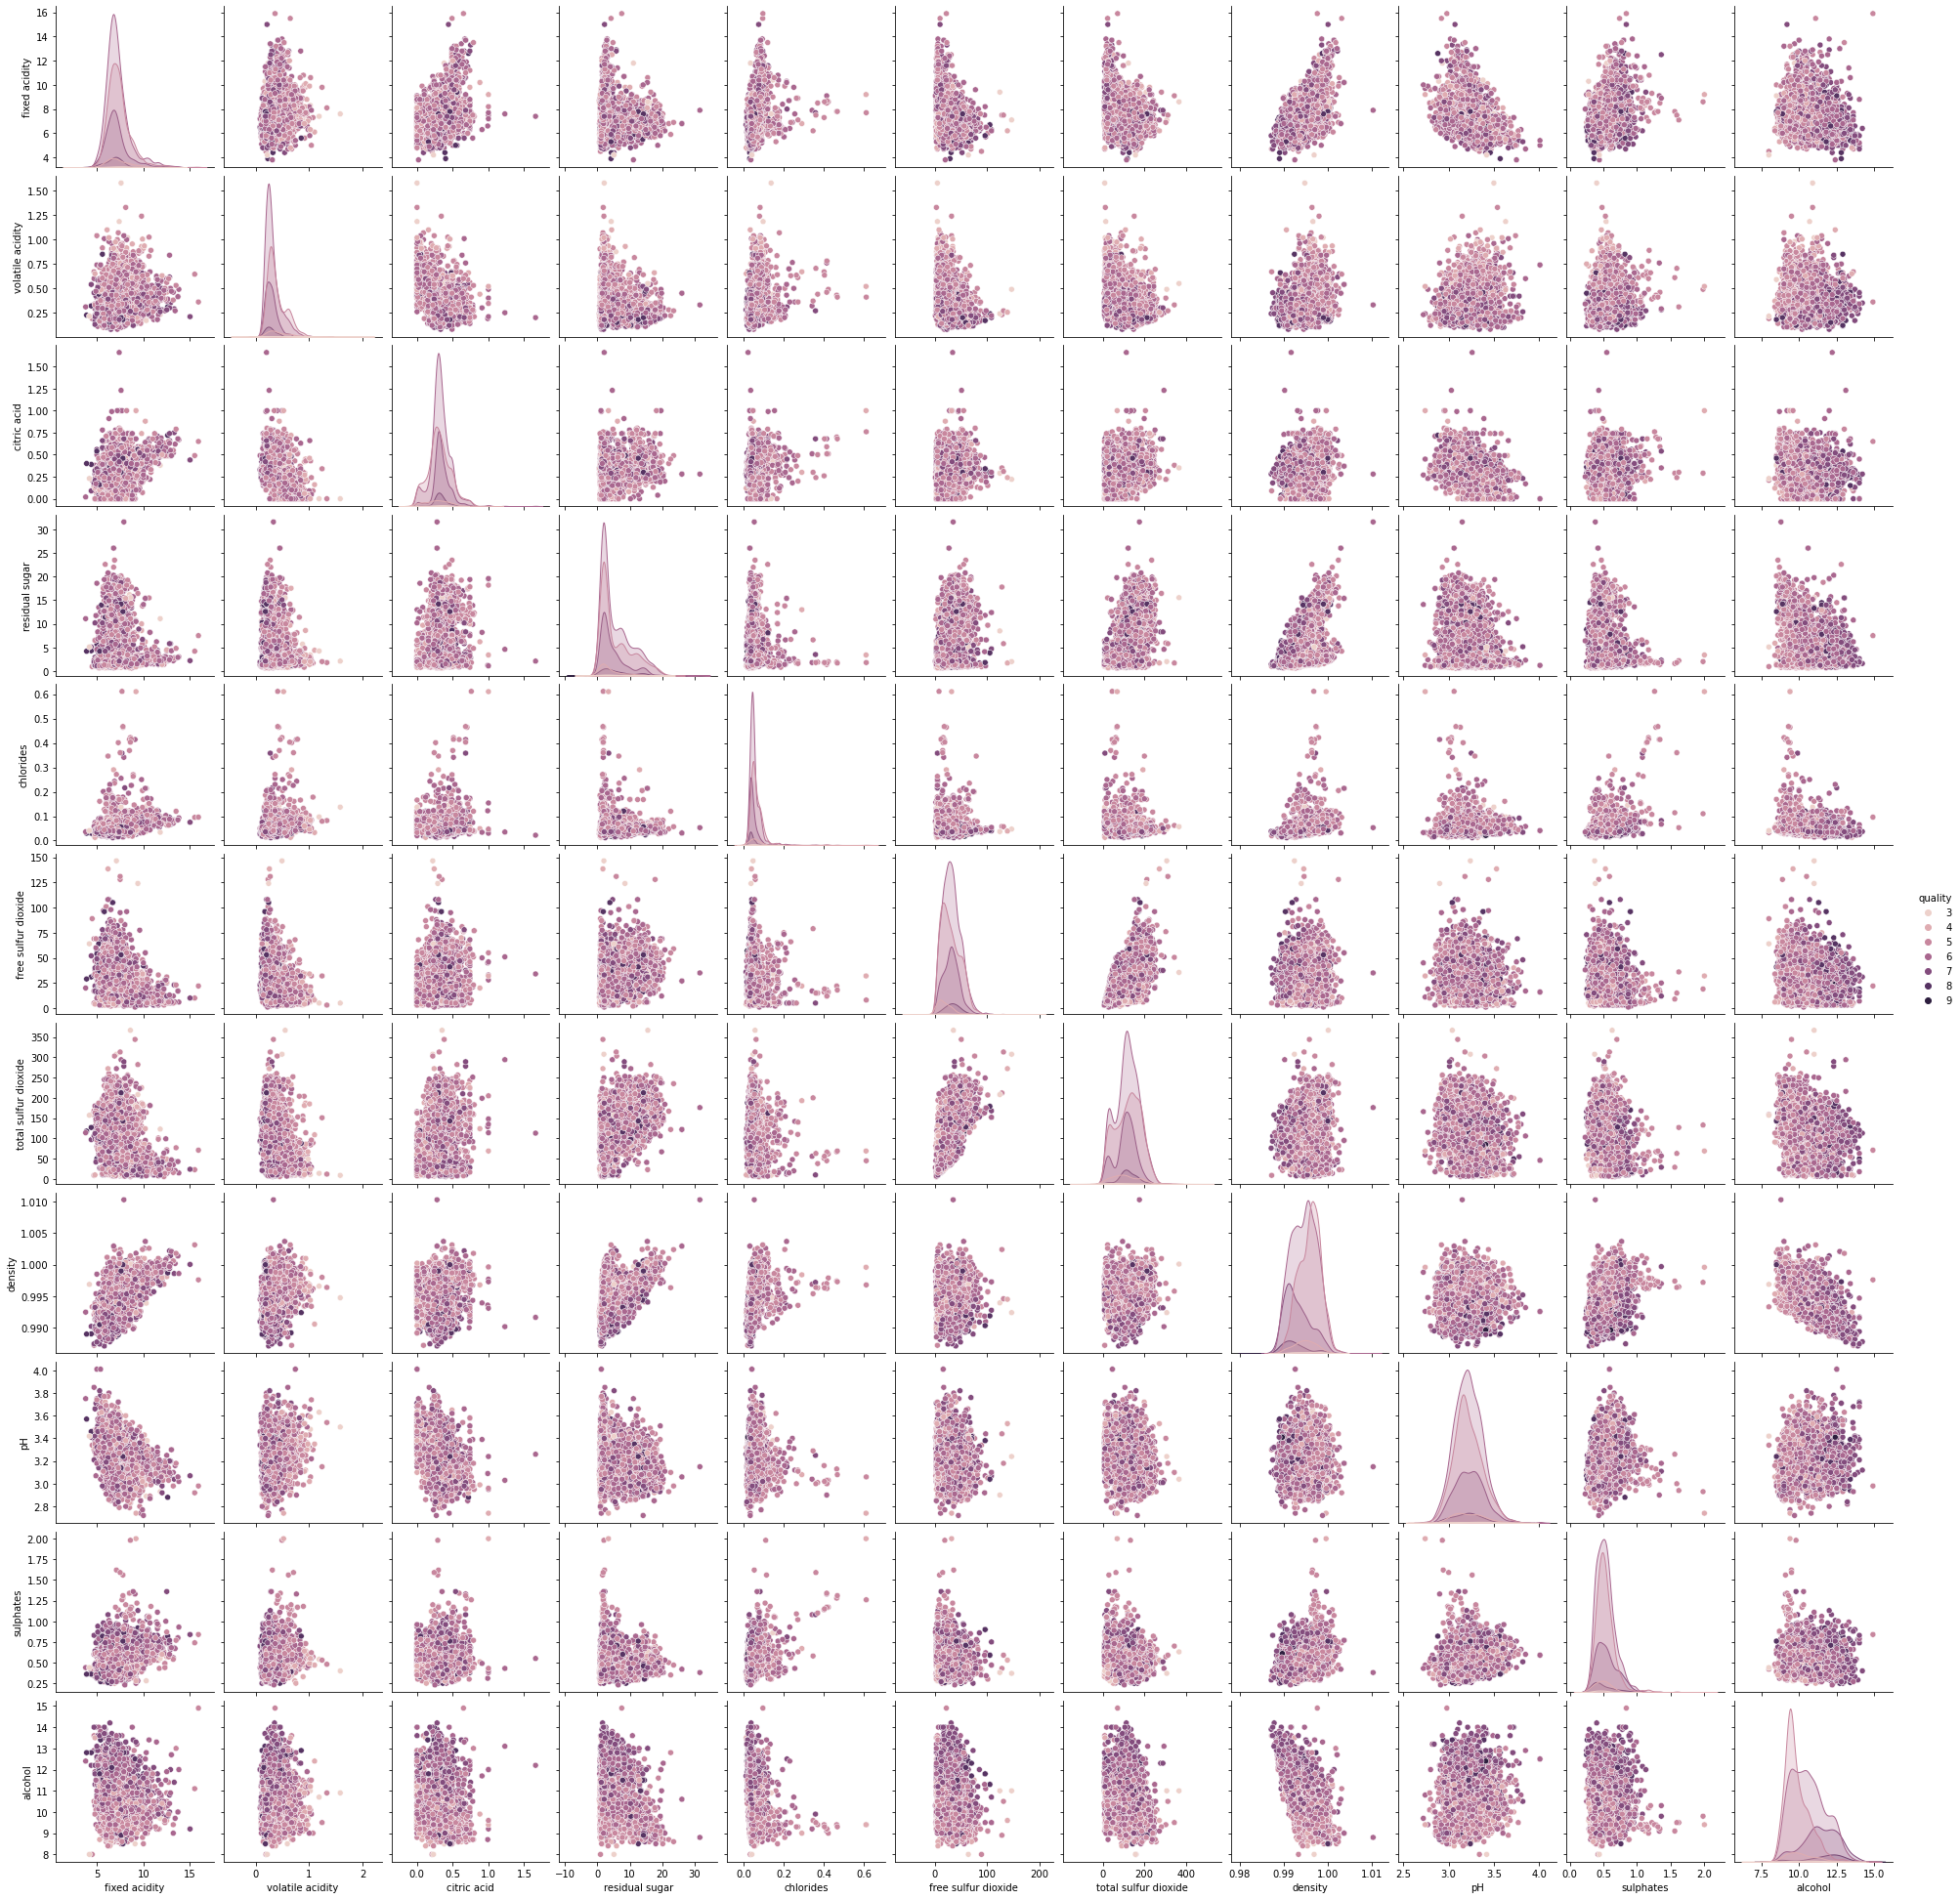

In [159]:
sns.pairplot(df_train,hue='quality')

# 11. Draw countplot for at least one numerical column.

In [204]:
df_train['quality'].value_counts()

6    1900
5    1432
7     723
4     145
8     129
3      20
9       3
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

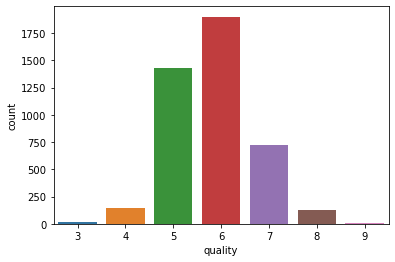

In [205]:
sns.countplot(x= 'quality',data = df_train)

# 14a. Before cleaning the data

In [206]:
df_train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.3,0.18,0.22,1.50,0.043,45.0,155.0,0.99238,3.19,0.48,10.2,5
1,white,5.7,0.32,0.38,4.75,0.033,23.0,94.0,0.99100,3.42,0.42,11.8,7
2,white,5.6,0.41,0.24,1.90,0.034,10.0,53.0,0.98815,3.32,0.50,13.5,7
3,red,10.8,0.29,0.42,1.60,0.084,19.0,27.0,0.99545,3.28,0.73,11.9,6
4,red,8.2,0.35,0.33,2.40,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,6


# 12. Cleaning and Processing the data

In [219]:
df_train['type']=df_train['type'].replace({'white':0,'red':1})
df_test['type']=df_test['type'].replace({'white':0,'red':1})

In [220]:
X_train=df_train.drop('quality',axis=1)
y_train=df_train['quality']
X_test=df_test.drop('quality',axis=1)
y_test=df_test['quality']

In [221]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# 13. Running the block of code to clean and process the data

In [222]:
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

# 14b. After cleaning the block of data

In [223]:
scaled_X_train

array([[-0.56107364, -0.71685972, -0.96059014, ..., -0.16195265,
        -0.32797387, -0.2503409 ],
       [-0.56107364, -1.18649941, -0.10109245, ...,  1.28177007,
        -0.73169589,  1.09675863],
       [-0.56107364, -1.26477269,  0.45144177, ...,  0.65406454,
        -0.19339986,  2.52805187],
       ...,
       [-0.56107364, -1.10822613, -0.89919745, ...,  3.47873942,
         0.47947017,  0.08643399],
       [-0.56107364,  0.14414639, -0.96059014, ...,  1.15622896,
        -0.79898289,  0.08643399],
       [-0.56107364,  1.16169906,  0.69701254, ...,  0.34021177,
         0.27760916, -0.33453462]])

# 15. Create your machine learning or data science model.

In [224]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
model=RandomForestClassifier()

# 16. Train or fit the model on the training dataset.

In [226]:
model.fit(scaled_X_train,y_train)

RandomForestClassifier()

# 17. Evaluate the accuracy score of the model on the training dataset.

In [227]:
y_pred=model.predict(scaled_X_train)

In [228]:
accuracy_score(y_train,y_pred)

1.0

# 18. Run 5-fold cross validation and print all the scores, the average, and standard deviation.

In [229]:
from sklearn.model_selection import cross_val_score

In [230]:
scores=cross_val_score(model,scaled_X_train,y_train,cv=5)

C:\Users\Yogitha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [231]:
scores

array([0.64753157, 0.64982778, 0.64022989, 0.62873563, 0.65977011])

In [232]:
scores.mean()

0.6452189978489515

In [233]:
scores.std()

0.010343273305665797

# 19. Run the model created to do prediction on the test dataset inputs and get the output or target.

In [235]:
my_model_predictions=model.predict(scaled_X_test)
my_model_predictions

array([6, 4, 5, ..., 6, 5, 7], dtype=int64)

# 20. Display the target or output predicted for the test dataset as a new dataframe.

In [236]:
predictions=pd.DataFrame({'original output':y_test,'my_model_output':my_model_predictions})

In [237]:
predictions

,original output,my_model_output
0,7,6
1,4,4
2,5,5
3,6,6
4,3,6
...,...,...
2140,6,6
2141,6,5
2142,6,6
2143,5,5


In [238]:
accuracy_score(y_test,my_model_predictions)

0.6764568764568765

# 21. Save the model prediction output to an excel spreadsheet and a csv file.

In [239]:
#21a excel file
predictions.to_excel('model_prediction.xlsx',index=False)

In [240]:
#21b csv file
predictions.to_csv('model_prediction.csv',index=False)